## Importing our Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

from IPython.display import Image
import plotly.offline as p
import plotly.graph_objs as go
p.init_notebook_mode(connected=True)

In [2]:
snap = pd.read_csv('/Users/MattMecca/Documents/Data Challenges/Data Folder/Example Client 1 – "SNAP".csv')

crackle = pd.read_csv('/Users/MattMecca/Documents/Data Challenges/Data Folder/Example Client 2 – "CRACKLE".csv')

pop = pd.read_csv('/Users/MattMecca/Documents/Data Challenges/Data Folder/Example Client 3 – "POP".csv')


I worked to transpose the data in order to make it more amenable to what we're doing.

In [3]:
snap = snap.iloc[1:6,:]

In [4]:
identifier1 = {'identifier': 'snap'} # Adding constant feature 
snap3 = pd.concat([snap, pd.DataFrame(identifier1, index = snap.index)], axis=1)
snap3.drop('total_estd_impressions', axis=1, inplace=True) 


In [5]:
crackle = crackle.iloc[:4,:]
crackle['non_unique_activations'] = crackle.total_activations - crackle.total_unique_activations
crackle

identifier2 = {'identifier': 'crackle'}
crackle3 = pd.concat([crackle, pd.DataFrame(identifier2, index=crackle.index)], axis=1)
crackle3.drop('total_estd_impressions', axis=1, inplace=True) 
crackle3.drop('non_unique_activations', axis=1, inplace=True) 



In [6]:
pop = pop.iloc[0:4,:]
pop

identifier3 = {'identifier': 'pop'}
pop3 = pd.concat([pop, pd.DataFrame(identifier3, index=pop.index)], axis=1)
pop2 = pop[['month', 'total_potential_reach', 'total_activations', 'total_engagements']]

pop2 = pd.melt(pop2, id_vars = 'month')
pop2 = pop2.sort_values(['month', 'value'], ascending=[True, False]).reset_index()
pop2 = pop2.iloc[:,1:4]



In [7]:
snap1 = snap[['month', 'unique_static_acts', 'unique_non_static_acts', 'total_unique_activations']]

snap1 = pd.melt(snap1, id_vars = 'month')
snap1 = snap1.sort_values(['month'], ascending=[True]).reset_index()
snap1 = snap1.iloc[:,1:4]


In [8]:
snap2 = snap[['month', 'total_potential_reach', 'total_estd_impressions', 'total_engagements']]

snap2 = pd.melt(snap2, id_vars = 'month')
snap2 = snap2.sort_values(['month', 'value'], ascending=[True, False]).reset_index()
snap2 = snap2.iloc[:,1:4]


In [9]:
crackle1 = crackle[['month', 'unique_static_acts', 'unique_non_static_acts', 'total_unique_activations']]

crackle1 = pd.melt(crackle1, id_vars = 'month')
crackle1 = crackle1.sort_values(['month'], ascending=[True]).reset_index()
crackle1 = crackle1.iloc[:,1:4]


In [10]:
crackle2 = crackle[['month', 'total_potential_reach', 'total_estd_impressions', 'total_engagements']]

crackle2 = pd.melt(crackle2, id_vars = 'month')
crackle2 = crackle2.sort_values(['month'], ascending=[True]).reset_index()
crackle2 = crackle2.iloc[:,1:4]


In [11]:
pop1 = pop[['month', 'unique_static_acts', 'unique_non_static_acts', 'total_unique_activations']]

pop1 = pd.melt(pop1, id_vars = 'month')
pop1 = pop1.sort_values(['month'], ascending=[True]).reset_index()
pop1 = pop1.iloc[:,1:4]


In [12]:
pop2 = pop[['month', 'total_potential_reach', 'total_engagements']]

pop2 = pd.melt(pop2, id_vars = 'month')
pop2 = pop2.sort_values(['month'], ascending=[True]).reset_index()
pop2 = pop2.iloc[:,1:4]


In [13]:
combo1 = snap1.merge(pop1, how='left', left_on = ['month', 'variable'], right_on = ['month', 'variable'])

combo1 = combo1.merge(crackle1, how='outer', left_on = ['month', 'variable'], right_on = ['month', 'variable'])
combo1 = combo1.sort_values(['month'], ascending=[True])

combo1.columns = ['month', 'variable', 'snap1_val', 'crack1_val', 'pop1_val']

In [14]:
combo2 = snap2.merge(pop2, how='left', left_on = ['month', 'variable'], right_on = ['month', 'variable'])

combo2 = combo2.merge(crackle2, how='outer', left_on = ['month', 'variable'], right_on = ['month', 'variable'])
combo2.sort_values(['month'], ascending=[True])

combo2.columns = ['month', 'variable', 'snap2_val', 'crack2_val', 'pop2_val']


In [15]:
stacked_combo = pd.concat([snap3, crackle3, pop3], axis=0).reset_index(drop = True)


In [16]:
total_engagements = combo2.loc[combo2.variable == 'total_engagements']
total_potential_reach = combo2.loc[combo2.variable == 'total_potential_reach']


In [17]:
snap2 = snap[['month', 'conf_seedings', 'total_activations']].reset_index(drop = True)
identifier1 = {'identifier': 'snap'} # Adding constant feature 
snap2 = pd.melt(snap2, id_vars = 'month')
snap2 = pd.concat([snap2, pd.DataFrame([identifier1]*len(snap2))], axis = 1)
snap2 = snap2.sort_values(['month'], ascending=[True]).reset_index(drop = True)


In [18]:
crackle2 = crackle[['month', 'conf_seedings', 'total_activations']]
identifier2 = {'identifier': 'crackle'} # Adding constant feature 
crackle2 = pd.melt(crackle2, id_vars = 'month')
crackle2 = pd.concat([crackle2, pd.DataFrame([identifier2]*len(crackle2))], axis = 1)
crackle2 = crackle2.sort_values(['month'], ascending=[True]).reset_index(drop = True)


In [19]:
pop2 = pop[['month', 'conf_seedings', 'total_activations']]
identifier3 = {'identifier': 'pop'} # Adding constant feature 
pop2 = pd.melt(pop2, id_vars = 'month')
pop2 = pd.concat([pop2, pd.DataFrame([identifier3]*len(pop2))], axis = 1)
pop2 = pop2.sort_values(['month'], ascending=[True]).reset_index(drop = True)


In [20]:
combo2 = snap2.merge(crackle2, how='left', left_on = ['month', 'variable'], right_on = ['month', 'variable'])
combo2 = combo2.merge(pop2, how='left', left_on = ['month', 'variable'], right_on = ['month', 'variable'])
combo2 = combo2[['month', 'variable', 'value_x', 'value_y', 'value']]
combo2.columns = ['month', 'variable', 'snap2_val', 'crack2_val', 'pop2_val']



In [21]:
conf_seedings = combo2.loc[combo2['variable'] == 'conf_seedings'].reset_index(drop = True)
total_activations = combo2.loc[combo2['variable'] == 'total_activations'].reset_index(drop = True)


# Testing for Correlation 

I do a few "correlation tests" below. They aren't statistical –– simply graphical. I chose not to run any statistical tests here mainly because of the sparsity of our data.

## Seedings and their Effect on Total Activations

Here we look at Snap, Crackle, and Pops' seeding numbers and what kind of effect they have on the companys' total activation figures.

In [22]:
trace1 = go.Scatter(x = conf_seedings.month, 
                    y = conf_seedings['snap2_val'],
                    marker = dict(color = 'blue',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Snap –– Seedings',
                    line = dict(dash = 'dashdot'))

trace2 = go.Scatter(x = conf_seedings.month, 
                    y = conf_seedings['crack2_val'],
                    marker = dict(color = 'green',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Crackle –– Seedings',
                    line = dict(dash = 'dashdot'))

trace3 = go.Scatter(x = conf_seedings.month, 
                    y = conf_seedings['pop2_val'],
                    marker = dict(color = 'red',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Pop –– Seedings',
                    line = dict(dash = 'dashdot'))

trace4 = go.Scatter(x = total_activations.month, 
                    y = total_activations['snap2_val'],
                    marker = dict(color = 'blue',
                                line = dict(color='rgb(8,48,107)',
                                width = 3.5)),
                    name = 'Snap –– Activations')

trace5 = go.Scatter(x = total_activations.month, 
                    y = total_activations['crack2_val'],
                    marker = dict(color = 'green',
                                line = dict(color='rgb(8,48,107)',
                                width = 3.5)),
                    name = 'Crackle –– Activations')

trace6 = go.Scatter(x = total_activations.month, 
                    y = total_activations['pop2_val'],
                    marker = dict(color = 'red',
                                line = dict(color='rgb(8,48,107)',
                                width = 3.5)),
                    name = 'Pop –– Activations')

layout = go.Layout(title = 'Seedings and their effect on Total Activations',
                   autosize = False,
                   xaxis = dict(
                                title='Month',
                                titlefont=dict(
                                family='Courier New, monospace',
                                size=18,
                                color='#7f7f7f')),
                   yaxis = dict(
                                title='Total Sum',
                                titlefont=dict(
                                family='Courier New, monospace',
                                size=18,
                                color = '#7f7f7f')))


data1 = [trace1, trace2, trace3, trace4, trace5, trace6]

fig1 = go.Figure(data = data1, layout = layout)
p.iplot(fig1)

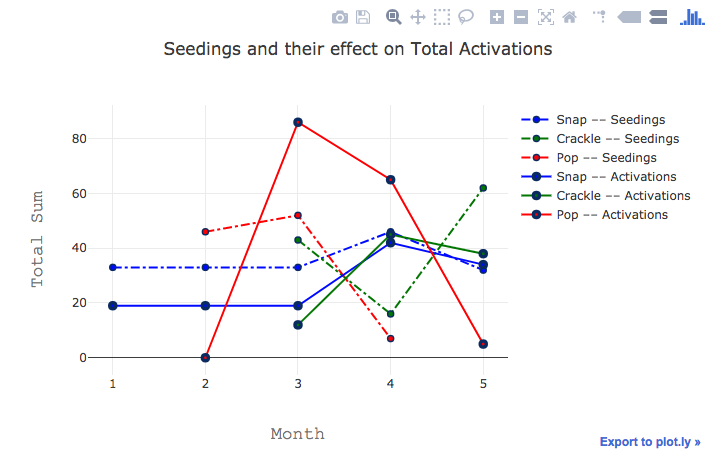

In [26]:
Image(filename = '/Users/MattMecca/Documents/Data Challenges/Data Folder/lms-part1.png')

This graph is harder to read, but it seems that, for the most part, seedings share a **positive** correlation with activations. The only time where that is not true is with the Crackle company. There seems to a exists a sharply ***negative*** correlation there.

I took the log for some of these graphs so as to make this readable. My reasoning for this was the number of 'Engagements' is exponentially larger than the number of 'Seedings' that have taken place. By my eye, it seems seedings have an appreciable effect on Pop's engagements, though the effect is lagged by a period or two and its persistence seems variable. Snap's seeding almost perfectly predicts, or explains, the movement of its engagements. As for crackle,the same negative correlation we saw between our two variables of interest seems to persist here as well.

## Seedings and Activations

The idea here is that the greater the number of **seedings** (i.e., the more products we send to influencers), the greater the number of **activations**. We test our hypothesis below:

In [23]:
trace1 = go.Scatter(x = conf_seedings.month, 
                    y = conf_seedings['snap2_val'],
                    marker = dict(color = 'blue',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Snap –– Seedings',
                    line = dict(dash = 'dashdot'))

trace2 = go.Scatter(x = conf_seedings.month, 
                    y = conf_seedings['crack2_val'],
                    marker = dict(color = 'green',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Crackle –– Seedings',
                    line = dict(dash = 'dashdot'))

trace3 = go.Scatter(x = conf_seedings.month, 
                    y = conf_seedings['pop2_val'],
                    marker = dict(color = 'red',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Pop –– Seedings',
                    line = dict(dash = 'dashdot'))

trace4 = go.Scatter(x = total_activations.month, 
                    y = total_activations['snap2_val'],
                    marker = dict(color = 'blue',
                                line = dict(color='rgb(8,48,107)',
                                width = 3.5)),
                    name = 'Snap –– Engagements')

trace5 = go.Scatter(x = total_activations.month, 
                    y = total_activations['crack2_val'],
                    marker = dict(color = 'green',
                                line = dict(color='rgb(8,48,107)',
                                width = 3.5)),
                    name = 'Crackle –– Engagements')

trace6 = go.Scatter(x = total_activations.month, 
                    y = total_activations['pop2_val'],
                    marker = dict(color = 'red',
                                line = dict(color='rgb(8,48,107)',
                                width = 3.5)),
                    name = 'Pop –– Engagements')

layout = go.Layout(title = 'Seedings and their Effect on Total Activations',
                   autosize = False,
                   xaxis = dict(
                                title='Month',
                                titlefont=dict(
                                family='Courier New, monospace',
                                size=18,
                                color='#7f7f7f')),
                   yaxis = dict(
                                type = 'log',
                                title='Total Sum',
                                titlefont=dict(
                                family='Courier New, monospace',
                                size=18,
                                color = '#7f7f7f')))


data1 = [trace1, trace2, trace3, trace4, trace5, trace6]

fig1 = go.Figure(data = data1, layout = layout)
p.iplot(fig1)

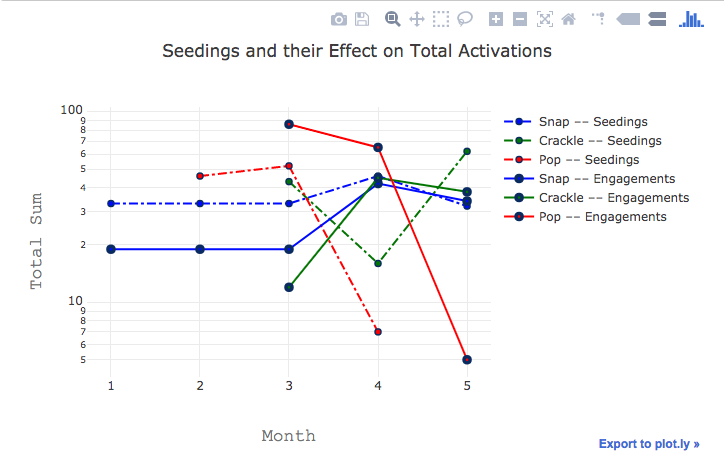

In [27]:
Image(filename = '/Users/MattMecca/Documents/Data Challenges/Data Folder/lms-part2.png')

We can see that there is (like there seems to be with most other things) a strong ***positive*** correlation shared between **seedings** and **engagement** for Snap, a strong ***negative*** correlation for Crackle, and a **lagged** yet ***positive*** correlation for Pop.

## Reach and its Effect on Engagement

This test is more to emphasize the importance of control variables, and why we'd need to include them in whatever causation/correlation tests we'd run.

For example, one thing that we ought to control for when determining how many like or shares or whatever (**engagement**) an influencer gets is **reach**. This is why running a multivariate analysis is so important –– having a control variable such as **reach** makes whatever our variable of interest is far easier to interpret; it also makes its regression estimate a lot more accurate. We aren't using a multivariate regression here, though, and including nine lines on a graph is sure to get messy. (I'm also not so sure it would be interpretable.) With this thought, we look below:

In [24]:
trace1 = go.Scatter(x = total_potential_reach.month, 
                    y = total_potential_reach['snap2_val'],
                    marker = dict(color = 'blue',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    line = dict(dash = 'dashdot'),
                    name = 'Snap')

trace2 = go.Scatter(x = total_potential_reach.month, 
                    y = total_potential_reach['crack2_val'],
                    marker = dict(color = 'green',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    line = dict(dash = 'dashdot'),
                    name = 'Crackle')

trace3 = go.Scatter(x = total_potential_reach.month, 
                    y = total_potential_reach['pop2_val'],
                    marker = dict(color = 'red',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    line = dict(dash = 'dashdot'),
                    name = 'Pop')

trace4 = go.Scatter(x = total_engagements.month, 
                    y = total_engagements['snap2_val'],
                    marker = dict(color = 'blue',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Snap')

trace5 = go.Scatter(x = total_engagements.month, 
                    y = total_engagements['crack2_val'],
                    marker = dict(color = 'green',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Crackle')

trace6 = go.Scatter(x = total_engagements.month, 
                    y = total_engagements['pop2_val'],
                    marker = dict(color = 'red',
                                line = dict(color='rgb(8,48,107)',
                                width = 1.5)),
                    name = 'Pop')

layout = go.Layout(title = 'Total Engagements by Total Potential Reach',
                   autosize = False,
                   xaxis = dict(
                                title='Month',
                                titlefont=dict(
                                family='Courier New, monospace',
                                size=18,
                                color='#7f7f7f')),
                   yaxis = dict(
                                type = 'log',
                                title='Total Sum',
                                titlefont=dict(
                                family='Courier New, monospace',
                                size=18,
                                color = '#7f7f7f')))


data1 = [trace1, trace2, trace3, trace4, trace5, trace6]

fig1 = go.Figure(data = data1, layout = layout)
p.iplot(fig1)

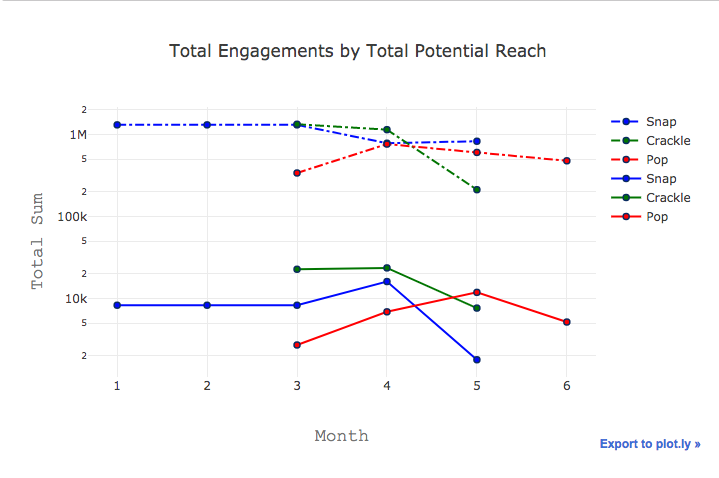

In [28]:
Image(filename = '/Users/MattMecca/Documents/Data Challenges/Data Folder/lms-part3.png')

It's made obvious here that **engagement** largely depends on **reach**, and when checking for something like the effect of **seedings** on **unique activations**, for example, maybe there's a **control** variable we haven't fully considered (like past use of other agency's materials). If given the opportunity, collecting those types of control variables would definitely be a priority of mine.

## Final Thoughts

We can do little more than plot line graphs/make observation with this data. Much more useful would have been micro-level data –– or individual influencer data before it's aggregated. With that we could perform (mathematical) correlation analysis, regression, and the like. With this dataset, though, we're limited in what we can do. I felt like running a regression –– something I like to do in these sort of projects –– would have been overkill here. The dataset was simply too small. 

Also because of its size, though, was the fact that the results were relatively easy to eyeball. And so a regression, while it may have confirmed the statistical significance of our indepenent variables, it would not have answered our questions much better than what we already had. What was lacking, though, was a multivariate analysis. As we saw with our control variable "example", more than one factor is going to be a causal, and so in that case a multivariate regression would obviously have come in handy. There is only so much you can explain graphically. As for the questions asked, though:

1. Please provide an example of the ways in which you could contextualize this data for presentation to a non-technical audience?

I would try and do this just as I've done it above. The only thing I'd change if given the chance is the detail in which I work. I'd try and dig deeper if given better data. I think explaining the results of those tests –– while perhaps not as intuitive as showing a graph –– would not be as difficult as it might seem. Everything would and could be translated into laymen terms.  

2. How would you acquire better data than what we have here? What would your strategy and toolset be for coordinating the collection of data across campaigns where a set of influencers are receiving products and potentially posting about them on social media. What additional metrics might we report on? Which ones would be best to show to clients with the goal being to get the most exposure possible?

I think that collecting data on an influencer by influencer basis is a good place to start. Using APIs and forms of web scraping, we could do that to a relatively precise degree, I think. We could track each individual post and, given they market an item or advertisement that sets off some sort of "buzzword" indicating its ours (or of our interest), I would track the relevant data (again, using the proper API and having written an appropriate web scraping script). I think that this strategy could scale well across groups. The only thing we might have to take into account is advertising as a conglomerate. If, for example, the influencer was on tour with a bunch of other influencers that we were also doing business with, and the touring company was advertising them as a group, we'd have to parse by who was headlining the tour, who was the following act, etc.

But so I think that just about does it for me! I'd like to thank you for the opportunity. I can genuinely say that I enjoyed completing this assignment. I look forward to hearing your thoughts!


Best,

Matt Mecca